## Tarea 12

In [2]:
## Paqueteria a utilizar
using PyPlot

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

In [3]:
## Resolvamos el problema usando el Método de Newton como herramienta pues esta considera, además de la función a resolver, su derivada y un punto de partida inicial, obteniendo como resultado un cero (raíz) cercano a nuestro valor inicial

function Metodo_Newton(f,derivadaf,inicial)
    
    x=inicial;
    for i in 1:100
        x=x-f(x)/derivadaf(x)
    end
    #La función regresa el último valor de x obtenido
    return x
end

Metodo_Newton (generic function with 1 method)

In [4]:
## Usando ahora el método de Newton definimos el método implícito de Euler (en función del de Newton) agregando ahora una dependencia de una lista (listt)

function Imp_Euler(f,derivadaf,listt,x0)
    
## Definimos listx como un arreglo de raíces del mismo orden (entiéndase cardinalidad) que la lista de t's.
    listx=zeros(length(listt))
    listx[1]=x0
    h=listt[2]-listt[1]     ## Es la distancia entre las primeras entradas
    for i in 1:length(listt)-1     ## Guardamos las entradas de listx siguientes
        
## La siguiente función es a la que tenemos que encontrar su raíz (usando el método implícito) es decir, el "elemento" x_{i+1}.
    g(z)=z-f(z,listt[i+1])*h-listx[i]
    derivadag(z)= 1-derivadaf(z,listt[i+1])*h     ## Consideremos también su derivada
        
        
## Aplicamos el método de Newton a g, usando la condición inicial x_{i} y tomando cada raíz como el siguiente elemento(x_{i+1}).
    listx[i+1]=Metodo_Newton(g,derivadag,listx[i])    
    end
    
    return listx     ## Obtenemos los valores para x
    
end

## A resolver (utilizar) en el ejercicio 4

Imp_Euler (generic function with 1 method)

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

In [5]:
## Definimos la función para el método del punto medio

function Punto_M(f,listt,inicial)
    h=listt[2]-listt[1]     ## Nuevamente tenemos la distancia entre las primeros dos entradas
    
    listx=zeros(length(listt))     ## Misma longitud de las listas
    
    listx[1]=inicial
    
## Apliquemos las iteraciones dada la condición de recurrencia
    for i in 1:length(listt)-1
       listx[i+1]= listx[i]+h*f(listx[i]+(h/2)*f(listx[i],listt[i]),listt[i]+h/2)
    end 
    
    return listx     ## Obtenemos nuestros resultados
    
end

Punto_M (generic function with 1 method)

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [6]:
## Definamos nuestra frunción (omitiré comentar los pasos que, como en las funciones anteriores, se repiten)

function RK_O4(f,listt,x0)
    listx=zeros(length(listt))
    listx[1]=x0
    h=listt[2]-listt[1]
    
    for i in 1:length(listt)-1
        it1=f(listx[i],listt[i])
        it2=f(listx[i]+(h/2)*it1,listt[i]+h/2)
        it3=f(listx[i]+(h/2)*it2,listt[i]+h/2)
        it4=f(listx[i]+h*it3,listt[i+1])     ## Aplicamos la relación de recurrencia para cada iteración hasta orden 4
        
        listx[i+1]=listx[i]+(h/6)*(it1+2*it2+2*it3+it4)     ## Lista donde se guardan las x's obtenidas
        
    end
      
    return listx     ## Obtenemos las x's del paso anterior
    
end

RK_O4 (generic function with 1 method)

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

El ejercicio 1 pide resolver la ecuación:
$$\frac{dx}{dt}=-\alpha x,$$ donde $\alpha= -2.5$ y $t\in(0,8)$.

In [7]:
## Definamos G(x,t) como la derivada de "x" respecto de "t", así como su derivada (que sería la segunda)
G(x,t)= -2.5x
DG(x,t)=-2.5

DG (generic function with 1 method)

In [8]:
#Definimos los distintos arreglos de t's para intervalos cada vex menores

listt1=0:1:8     ## h=1
listt2=0:0.5:8
listt3=0:0.2:8
listt4=0:0.01:8     ## h=0.01

0.0:0.01:8.0

In [9]:
## Apliquemos nuestra función (método implícito de Euler) a cada una de las listas con la condición inicial x(0)=1.0 [esto último implica una solución exacta "exp(-2.5t)" ]

sol1=Imp_Euler(G,DG,listt1,1.0)
sol2=Imp_Euler(G,DG,listt2,1.0)
sol3=Imp_Euler(G,DG,listt3,1.0)
sol4=Imp_Euler(G,DG,listt4,1.0);

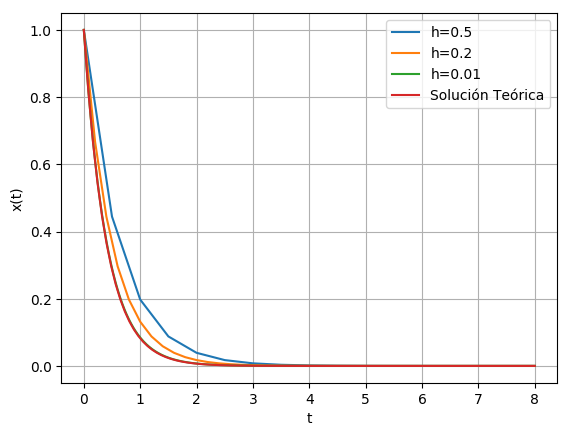

In [10]:
## G´raficas para cada h

plot(listt2,sol2,label="h=0.5");
plot(listt3,sol3,label="h=0.2");
plot(listt4,sol4,label="h=0.01");
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución Teórica");

grid("on");
xlabel("t");
ylabel("x(t)");
legend();
show();

## Observemos como el resultado va acercándose a la solución mientras más pequeño tomemos el intervalo "h"

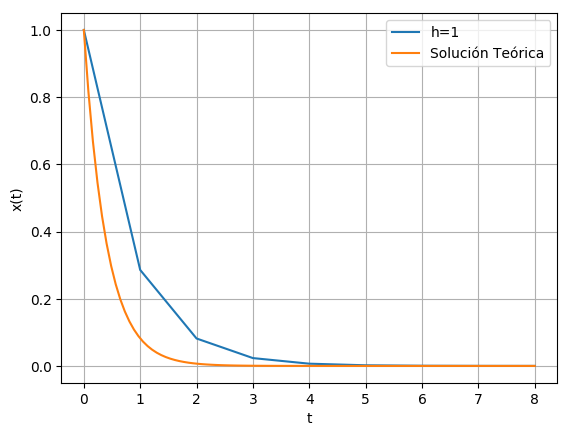

In [11]:
## Grafiquemos la solución para h=1

plot(listt1,sol1,label="h=1");
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución Teórica");


grid("on");
xlabel("t");
ylabel("x(t)");
legend();
show();


__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [12]:
## Definamos la función a resulver

F(x,t)=(2x-18t)/(1+t)

## MÉTODO DEL PUNTO MEDIO

## Consideremos los siguientes espacios temporales

lista1=0:0.5:12 ## t=0.5
lista2=0:0.2:12
lista3=0:0.01:12
lista4=0:0.001:12 ## t=0.001

0.0:0.001:12.0

In [13]:
## Usando la lista de arriba (con cada h diferente) apliquemos el método del punto medio considerando x(0)=4.0

PM1=Punto_M(F,lista1,4.0)
PM2=Punto_M(F,lista2,4.0)
PM3=Punto_M(F,lista3,4.0)
PM4=Punto_M(F,lista4,4.0)

12001-element Array{Float64,1}:
    4.0    
    4.008  
    4.01598
    4.02396
    4.03192
    4.03988
    4.04782
    4.05576
    4.06368
    4.0716 
    4.0795 
    4.0874 
    4.09528
    ⋮      
 -618.768  
 -618.88   
 -618.992  
 -619.104  
 -619.216  
 -619.328  
 -619.44   
 -619.552  
 -619.664  
 -619.776  
 -619.888  
 -620.0    

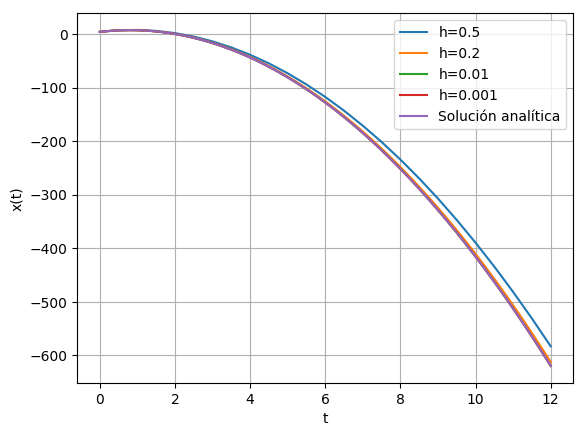

In [14]:
## Grafiquemos las soluciones

plot(lista1,PM1,label="h=0.5")
plot(lista2,PM2,label="h=0.2")
plot(lista3,PM3,label="h=0.01")
plot(lista4,PM4,label="h=0.001")
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");

xlabel("t")
ylabel("x(t)")
grid("on")
legend()
show();


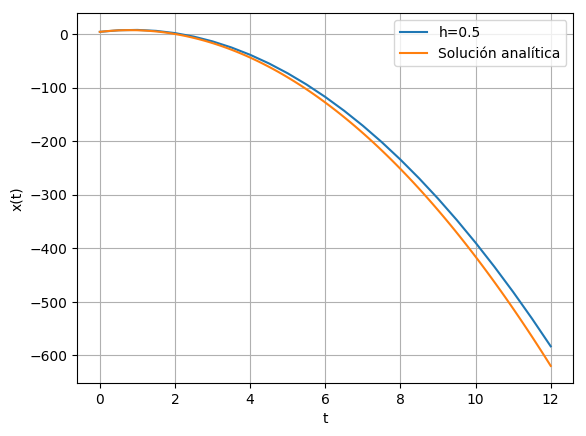

In [15]:
## Pondré ahora la solución para h=0.5 y la analítica para mostrar la separación más grande
plot(lista1,PM1,label="h=0.5")
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");

xlabel("t")
ylabel("x(t)")
grid("on")
legend()
show();


In [16]:
## MÉTODO DE RUNGE-KUTTA

## Resolvemos análogamente usando ahora la función "RK_O4" usando los mismos espacios temporales

RK1=RK_O4(F,lista1,4.0)
RK2=RK_O4(F,lista2,4.0)
RK3=RK_O4(F,lista3,4.0)
RK4=RK_O4(F,lista4,4.0)

12001-element Array{Float64,1}:
    4.0    
    4.008  
    4.01598
    4.02396
    4.03192
    4.03988
    4.04782
    4.05576
    4.06368
    4.0716 
    4.0795 
    4.0874 
    4.09528
    ⋮      
 -618.769  
 -618.88   
 -618.992  
 -619.104  
 -619.216  
 -619.328  
 -619.44   
 -619.552  
 -619.664  
 -619.776  
 -619.888  
 -620.0    

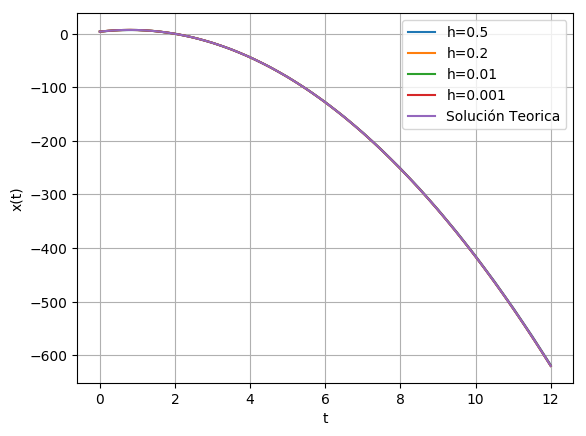

In [17]:
## Grafiquemos

plot(lista1,RK1,label="h=0.5")
plot(lista2,RK2,label="h=0.2")
plot(lista3,RK3,label="h=0.01")
plot(lista4,RK4,label="h=0.001")
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución Teorica")

grid("on")
xlabel("t")
ylabel("x(t)")
legend()
show();


## Parece que con RK las soluciones son muy aproximadas

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 
__Nota:__ Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos `listx` y `listv`, bastará con hacer `plot(listx,listv)`.

In [18]:
## Definamos los métodos de RK y de Euler para cualquier dimensión
## Primero Runge-Kutta (RK_2)

function RK_2(f,listt,inicial)
    h=listt[2]-listt[1]
    x=inicial
    
    listx=[]     ## Lista donde se guardarán los puntos de la solución
    push!(listx,x)

## Apliquemos la relación de recurrencia para cada iteración
    for i in 1:length(listt)-1
        it1=f(x,listt[i])
        it2=f(x+(h/2)*it1,listt[i]+h/2)
        it3=f(x+(h/2)*it2,listt[i]+h/2)
        it4=f(x+h*it3,listt[i+1])
        
        x=x+(h/6)*(it1+2*it2+2*it3+it4)
        
## Para cada iteración guardamos el punto obtenido
        push!(listx,x)
    end

    return listx     ## Imprimimos los puntos de la solución
end

RK_2 (generic function with 1 method)

In [19]:
## Ahora el médtodo de Euler (ME_2)

function ME_2(f,listt,inicial)
    
    h=listt[2]-listt[1]
    x=inicial
    
    listx=[]
    push!(listx,x)

## Aplicamos la relación de recurrencia para cada iteración
    for i in 1:length(listt)-1
        x = x + f(x,listt[i])*h
        push!(listx,x) 
    end

    return listx
end

ME_2 (generic function with 1 method)

Usemos la condición inicial $\overrightarrow{x}(0)=(x(0),u(0))=(3,6)$

In [28]:
## En este caso tenemos algo así como una función que arroja dos valores (uno para cada método), los cuales son la posición y la velocidad de una determinada partícula, se usará el comando "map" para seleccionar la entrada deseada

## Se define el arreglo de t's considerando h=0.01
T=0:0.01:50

## Definimos la lista de posiciones (x)
RK_x=map(x->x[1],RK_2(F,T,[3,6]))
## Definimos la lista de velocidades (v)
RK_v=map(x->x[2],RK_2(F,T,[3,6]))

## Definimos la lista de posiciones (x)
ME_x=map(x->x[1],ME_2(F,T,[3,6]))
## Definimos la lista de velocidades (v)
ME_v=map(x->x[2],ME_2(F,T,[3,6]));

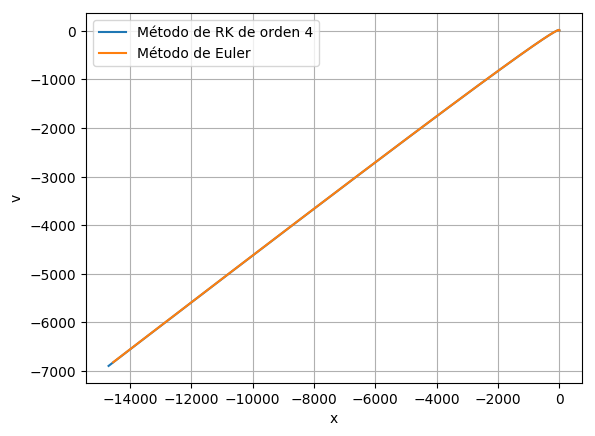

In [29]:
## Graficamos x vs v para ambos métodos
plot(RK_x,RK_v,label="Método de RK de orden 4");
plot(ME_x,ME_v,label="Método de Euler");

grid("on");
xlabel("x");
ylabel("v");
legend();
show();

##No se grafican las circunferencias..... :( seguiremos intentando

__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Nota:__ Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

__Nota:__ Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.